# 20240408 KNN(2)
## 지도학습
입력(데이터) ---- 타겟(정답) : 훈련데이터가 필요함

In [311]:
# 35 개 도미 (bream) 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 14개 빙어(smelt) 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 도미와 빙어 데이터 합치기
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

# 한마리 씩 데이터 출력
# list(zip(fish_length, fish_weight))

# 갯수 출력
count_fw = len(fish_weight)
count_fl = len(fish_length)
print(count_fw, count_fl)

49 49


In [312]:
import matplotlib.pyplot as plt

### 도미 산점도 시각화 코딩

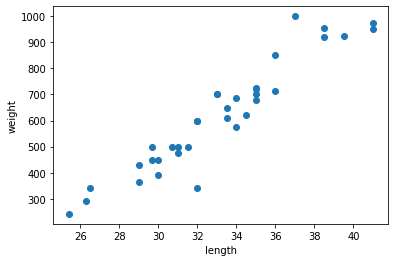

In [313]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 빙어 산점도 시각화 코딩

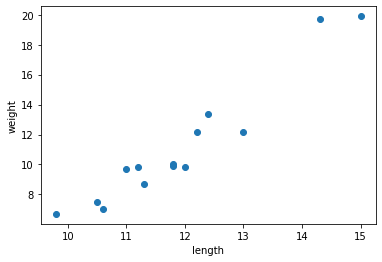

In [314]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 도미와 빙어 데이터 합쳐서 산점도 시각화 코딩

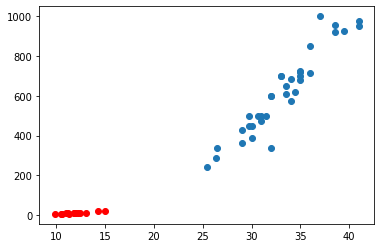

In [315]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight, color = 'red')

plt.show()

도미 빙어 2차원 리스트 만들기

In [316]:
# fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
# 넌파이 사용
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [317]:
# 데이터 개수 출력
print(len(fish_data))

49


 ## 정답 데이터 만들기

In [318]:
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## K-최근접 사이캇런 패키지에서 객체 만들기

In [319]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [320]:
print(fish_data[4]) # 5번째 데이터

[ 29. 430.]


In [321]:
print(fish_data[0:5]) # 1~5번째 데이터

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [322]:
print(fish_data[:5]) # 처음부터~5번째 데이터

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [323]:
print(fish_data[44:]) # 45번째부터 끝까지 데이터

[[12.2 12.2]
 [12.4 13.4]
 [13.  12.2]
 [14.3 19.7]
 [15.  19.9]]


## 훈련 데이터 / 테스트 데이터 나누기

In [324]:
# 훈련 세트(train set)로 입력값 중 0~34번째 인덱스 사용
train_input = fish_data[:35]
# 훈련 세트(train set)로 타깃값 중 0~34번째 인덱스 사용
train_target = fish_target[:35]

# 테스트 세트(test set)로 입력값 중 35~끝까지 인덱스 사용
test_input = fish_data[35:]
# 테스트 세트(test set)로 타깃값 중 35~끝까지 인덱스 사용
test_target = fish_target[35:]

## 샘플링 편향 = smapling bias
( 훈련 데이터가 모두 도미이고 테스트 데이터가 모두 빙어인 경우 = 0%)

In [325]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

numpy 배열을 섞어주는 함수를 이용하여 데이터 섞기

In [326]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
# target_arr = fish_target

In [327]:
input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [328]:
print(input_arr.shape)

(49, 2)


In [329]:
print(target_arr)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [330]:
# 다른사람이 나이 데이터를 가지고 동일한 데이터를 얻기 위하려 seed의 수를 지정한다.
np.random.seed(42) # 일정한 결과를 얻기위해서 최기에 랜덤시드를 지정
index = np.arange(49) # 0~48까지 49개의 배열을 만듬
np.random.shuffle(index) # index 배열을 섞음

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [331]:
print(input_arr[[0,1,2,3,4,5,6,7,8,9,10]])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]
 [ 30.  450. ]
 [ 30.7 500. ]
 [ 31.  475. ]]


In [332]:
print(input_arr[[0,1]])

[[ 25.4 242. ]
 [ 26.3 290. ]]


In [333]:
print(input_arr[[1,2]])

[[ 26.3 290. ]
 [ 26.5 340. ]]


index 배열의 처음 5개를 input_arr, target_arr에 전달하여, 랜덤하게 5개의 샘플을 훈련세트로 만듬

나머지 14개로 테스트 세트를 만듦

In [334]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [335]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(input_arr[48], train_input[0])

[15.  19.9] [ 32. 340.]


훈련, 테스트가 잘 섞여 있는지 산점도로 확인 (파랑 : 훈련, 주활: 테스트)

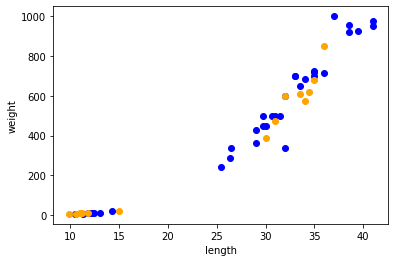

In [336]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1], color = 'blue')
plt.scatter(test_input[:,0], test_input[:,1], color = 'orange')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

두번쨰 머신러닝 프로그램 ( 훈련세트, 테스트 세트 -> KNN모델 훈련)

In [337]:
kn = kn.fit(train_input, train_target)

In [338]:
kn.score(test_input, test_target)

1.0

In [339]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [340]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [341]:
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
